In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image parameters
IMG_SIZE = (48, 48)
BATCH_SIZE = 64

# Normalize and rescale the images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'emotion_data/train',           # path to training data
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    'emotion_data/train',
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'emotion_data/test',
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build the CNN model
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

C:\Users\IT SHOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build the CNN model
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)

C:\Users\IT SHOP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 261s 688ms/step - accuracy: 0.2847 - loss: 1.9674 - val_accuracy: 0.2994 - val_loss: 2.0057
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 65s 182ms/step - accuracy: 0.4107 - loss: 1.5025 - val_accuracy: 0.4574 - val_loss: 1.4233
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 75s 208ms/step - accuracy: 0.4615 - loss: 1.3763 - val_accuracy: 0.4794 - val_loss: 1.3430
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 69s 192ms/step - accuracy: 0.5023 - loss: 1.2900 - val_accuracy: 0.4773 - val_loss: 1.3342
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 73s 203ms/step - accuracy: 0.5314 - loss: 1.2249 - val_accuracy: 0.5177 - val_loss: 1.2656
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 75s 207ms/step - accuracy: 0.5572 - loss: 1.1610 - val_accuracy: 0.5024 - val_loss: 1.2949
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 79s 219ms/step - accuracy: 0.5807 - loss: 1.0897 - val_accuracy: 0.4884 - val_loss: 1.3356
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 79s 219ms/step - accuracy: 0.6126 - loss: 

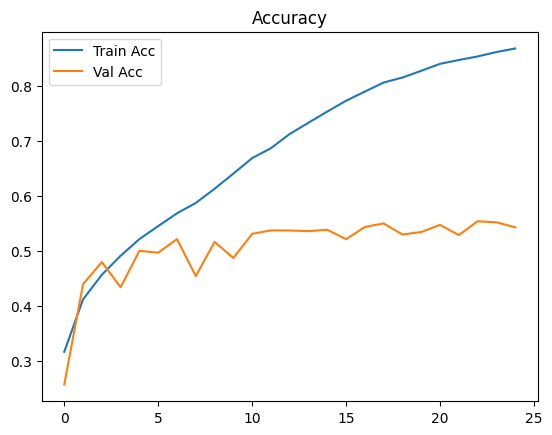

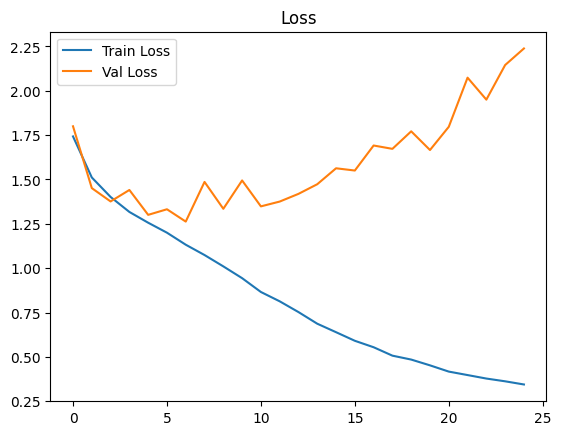

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.4635 - loss: 2.6845
Test Accuracy: 0.55
Test Loss: 2.20


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step


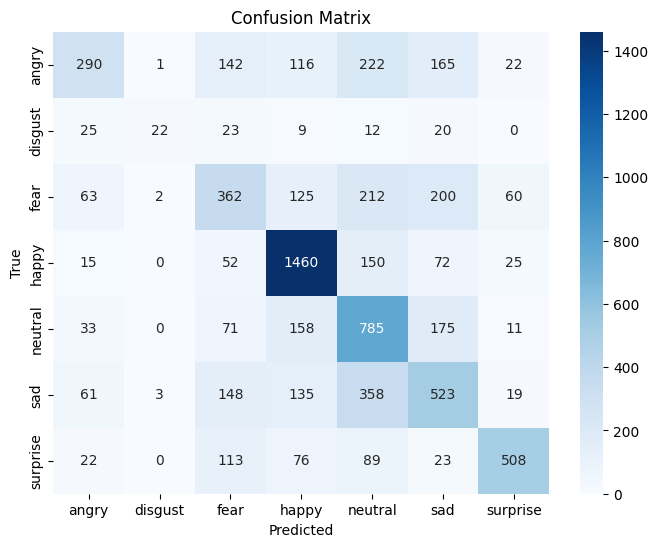

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step


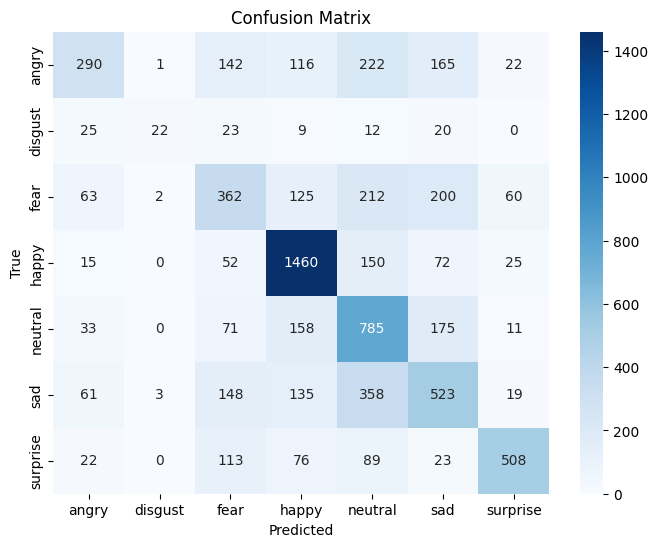

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
img_path = r"C:\Users\IT SHOP\Desktop\am2\final_project\emotion_data\test\angry\PrivateTest_88305.jpg"  # Updated filename
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted Emotion: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Predicted Emotion: happy


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your custom image
img_path = r"C:\Users\IT SHOP\Desktop\am2\final_project\emotion_data\test\disgust\PublicTest_98815442.jpg"  # change this to your image path
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict emotion
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted Emotion: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Emotion: sad


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 68s 188ms/step - accuracy: 0.8819 - loss: 0.3162 - val_accuracy: 0.5489 - val_loss: 2.0911
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 60s 168ms/step - accuracy: 0.8871 - loss: 0.2980 - val_accuracy: 0.5431 - val_loss: 2.3899
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 61s 169ms/step - accuracy: 0.8864 - loss: 0.2951 - val_accuracy: 0.5447 - val_loss: 2.0917
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 68s 191ms/step - accuracy: 0.8937 - loss: 0.2877 - val_accuracy: 0.5548 - val_loss: 2.2425
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 62s 172ms/step - accuracy: 0.8936 - loss: 0.2747 - val_accuracy: 0.5543 - val_loss: 2.3258
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 60s 167ms/step - accuracy: 0.8972 - loss: 0.2670 - val_accuracy: 0.5499 - val_loss: 2.3851


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your custom image
img_path = r"C:\Users\IT SHOP\Desktop\am2\final_project\emotion_data\test\disgust\PublicTest_98815442.jpg"  # change this to your image path
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict emotion
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted Emotion: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Emotion: sad
